In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from utils import count_houses, plot_ratio_map

# Load datasets

In [2]:
parcels = gpd.read_file('data/buildings.geojson')

In [3]:
bcn = pd.read_csv("data/barcelona.csv")
bcn['geometry'] = gpd.points_from_xy(bcn['longitude'], bcn['latitude'])
bcn = gpd.GeoDataFrame(bcn, geometry='geometry', crs="EPSG:4326")
bcn['property_type_basic'] = bcn['property_type'].apply(lambda x: 'Flat' if 'entire' in str(x).lower() else 'Room')

In [4]:
flats = bcn[bcn['property_type_basic'] == 'Flat']
rooms = bcn[bcn['property_type_basic'] == 'Room']

In [5]:
ad_boundaries = gpd.read_file('data/0301100100_UNITATS_ADM_POLIGONS.json')
ad_boundaries = ad_boundaries.to_crs('EPSG:4326')
censal = ad_boundaries[ad_boundaries['SCONJ_DESC']=='Secció censal']
barris = ad_boundaries[ad_boundaries['SCONJ_DESC']=='Barri']
districts = ad_boundaries[ad_boundaries['SCONJ_DESC']=='Districte']
barri_code = barris[['BARRI', 'NOM']]


In [6]:
censal['NOM'] = censal['BARRI'].apply(
    lambda b: barri_code.loc[barri_code['BARRI'] == b, 'NOM'].iloc[0] 
    if (barri_code['BARRI'] == b).any() 
    else None
)

/Users/mherrero/Documents/parasites/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


# Results

## Per censal section

In [7]:
censal = count_houses(parcels, censal, out_label = 'n_parcels', parcel_id_col ='parcel_id', apartments_col  = 'numberOfBuildingUnits')
censal = count_houses(flats, censal, out_label = 'n_abnb', parcel_id_col ='id', apartments_col  = None)
censal['ratio'] = censal['n_abnb'] / censal['n_parcels']

/Users/mherrero/Documents/parasites/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mherrero/Documents/parasites/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels.drop(columns=[apartments_col], inplace=True)


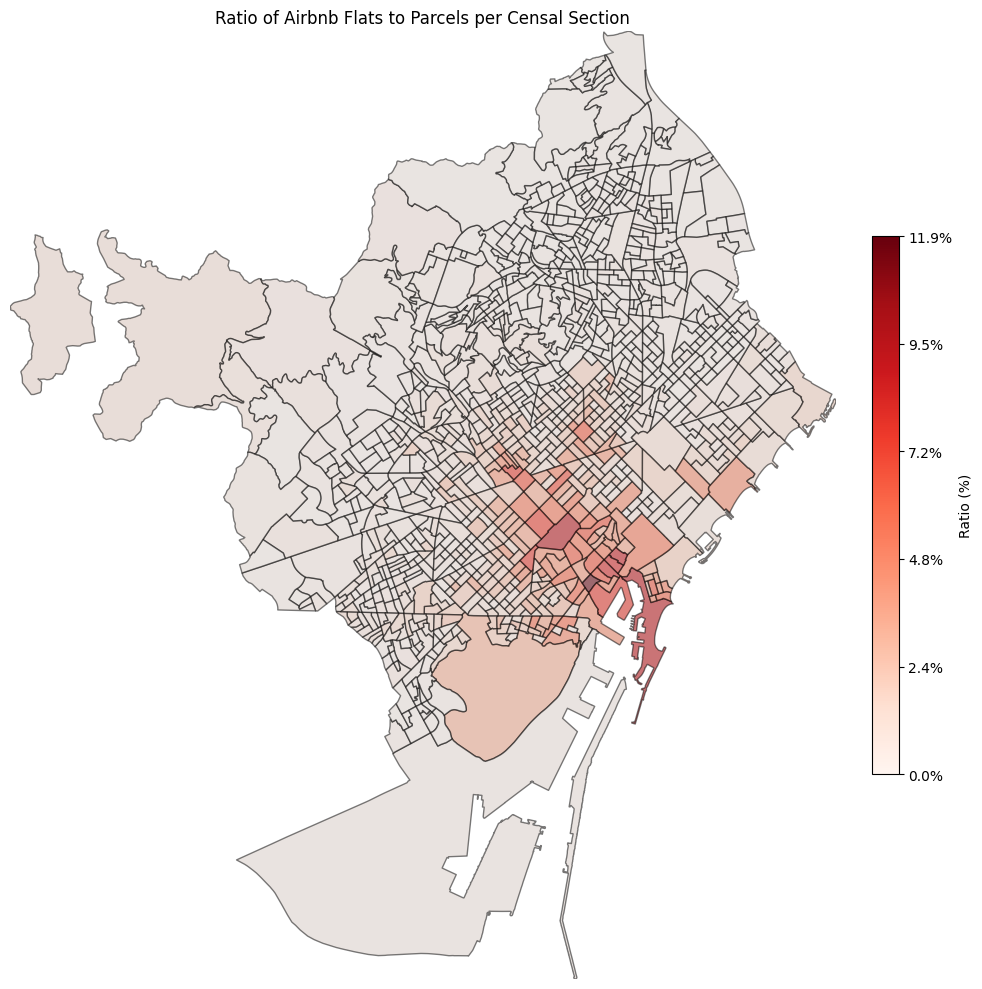

In [8]:
plot_ratio_map(gdf=censal, base_gdf=censal)

In [9]:
hottest = censal[censal['ratio'] > 0.05]

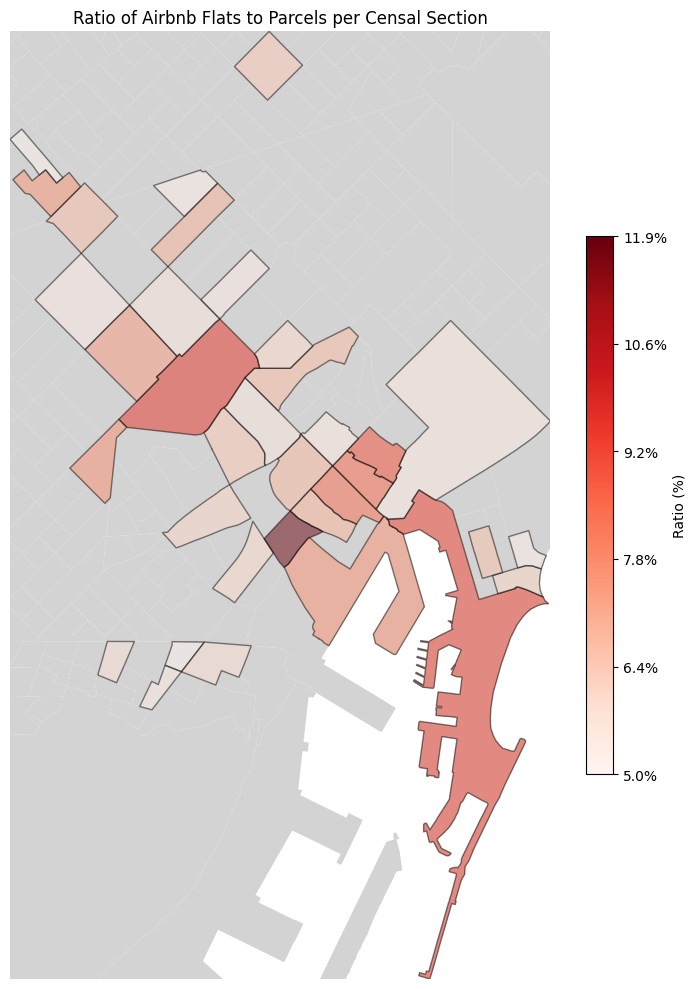

In [12]:
plot_ratio_map(gdf=hottest, base_gdf=censal)


/var/folders/y4/36wfzpkn3zj_yfdqyjvfd0x00000gn/T/ipykernel_7062/3249919570.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x*100:.1f}%" for x in ax.get_xticks()])


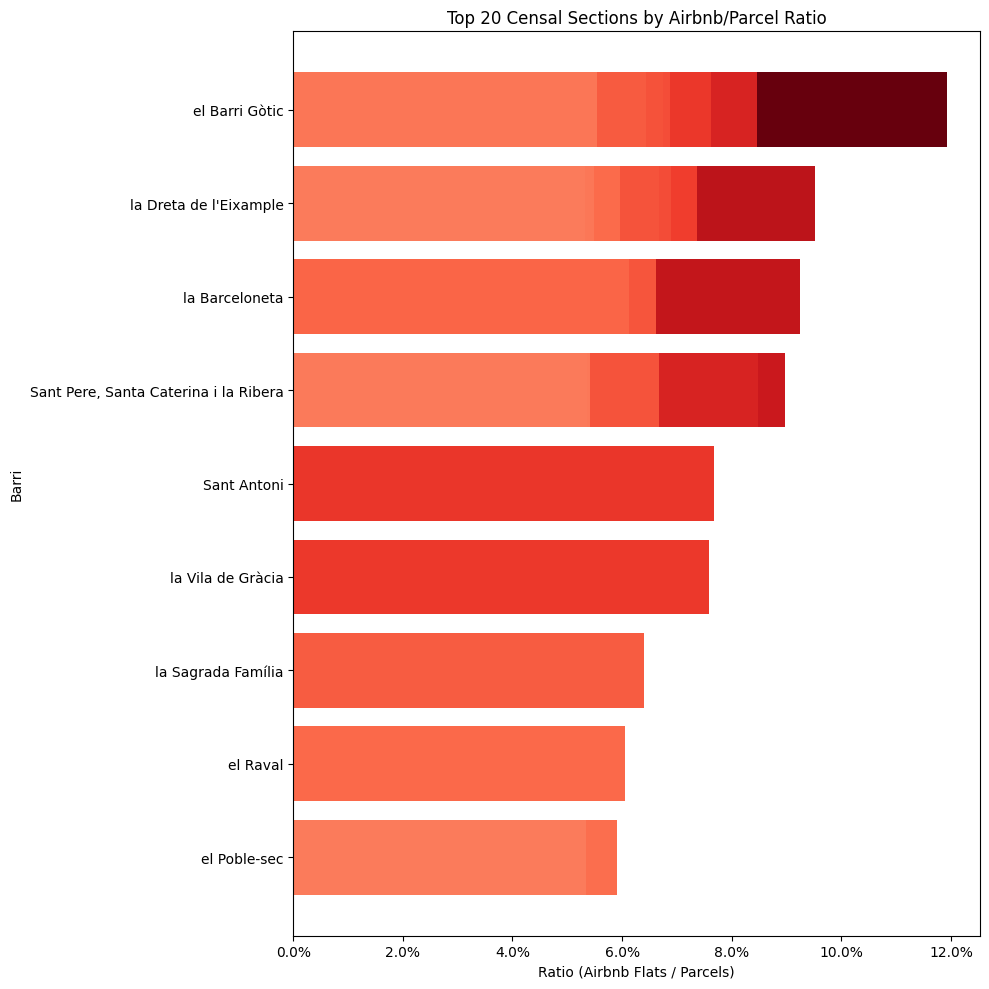

In [13]:
# Prepare top 20 censal sections by ratio
top_censals = censal.sort_values('ratio', ascending=False).head(30)
# Format x-axis labels as percentages

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Horizontal bar plot
ax.barh(top_censals['NOM'], top_censals['ratio'], color=plt.cm.Reds(top_censals['ratio'] / top_censals['ratio'].max()))

# Labels and title
ax.set_xlabel('Ratio (Airbnb Flats / Parcels)')
ax.set_ylabel('Barri')
ax.set_title('Top 20 Censal Sections by Airbnb/Parcel Ratio')
ax.set_xticklabels([f"{x*100:.1f}%" for x in ax.get_xticks()])
# Invert y-axis to show the highest ratio on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## Per barris

In [14]:
barris = count_houses(parcels, barris, out_label = 'n_parcels', parcel_id_col ='parcel_id', apartments_col  = 'numberOfDwellings')
barris = count_houses(flats, barris, out_label = 'n_abnb', parcel_id_col ='id', apartments_col  = None)
barris['ratio'] = barris['n_abnb'] / barris['n_parcels']

/Users/mherrero/Documents/parasites/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mherrero/Documents/parasites/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels.drop(columns=[apartments_col], inplace=True)


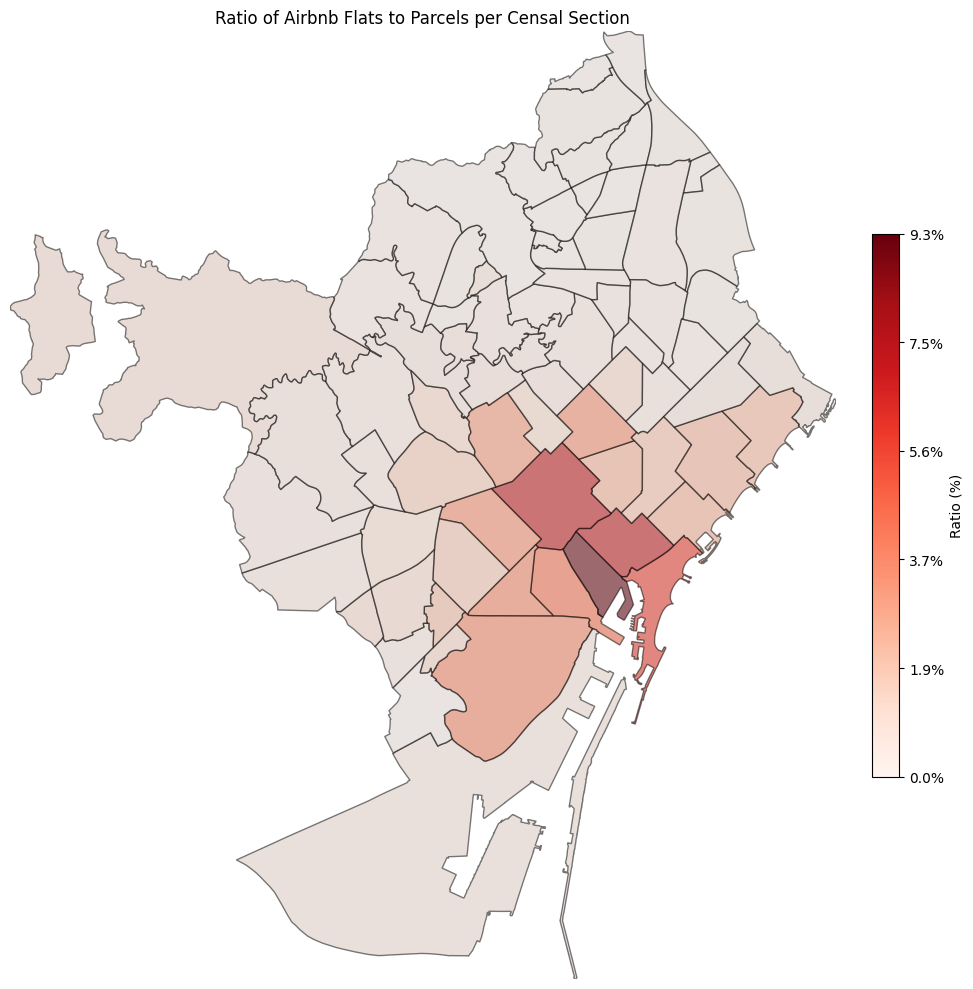

In [15]:
plot_ratio_map(gdf=barris, base_gdf=barris)

## Per district

In [16]:
districts = count_houses(parcels, districts, out_label = 'n_parcels', parcel_id_col ='parcel_id', apartments_col  = 'numberOfDwellings')
districts = count_houses(flats, districts, out_label = 'n_abnb', parcel_id_col ='id', apartments_col  = None)
districts['ratio'] = districts['n_abnb'] / districts['n_parcels']

/Users/mherrero/Documents/parasites/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mherrero/Documents/parasites/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels.drop(columns=[apartments_col], inplace=True)


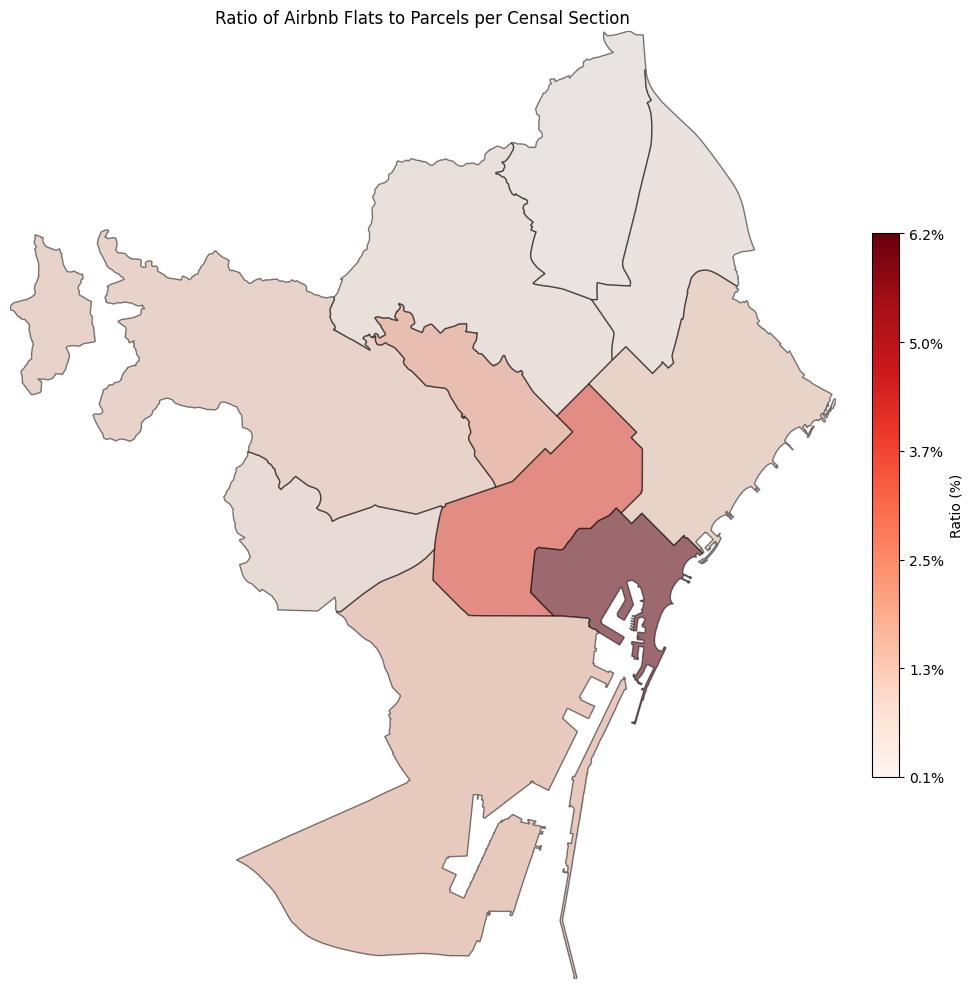

In [17]:
plot_ratio_map(gdf=districts, base_gdf=districts)

In [19]:
threshold = 0

toexplore = censal[['ratio', 'geometry']]
toexplore['ratio'] = 100*toexplore['ratio']
toexplore['ratio'] = toexplore['ratio'].apply(lambda x: np.floor(x * 10) / 10)
toexplore = toexplore[toexplore['ratio'] > threshold]

/Users/mherrero/Documents/parasites/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
# Plot without automatic legend
toexplore[['ratio', 'geometry']].explore(
    column='ratio',
    figsize=(10, 10),
    edgecolor='black',
    alpha=0.8,
    legend=True,
    tiles = "CartoDB positron",
    cmap='Reds',
)